# Comprehensive Analysis of Netflix Content

## Objective: 
*To perform a comprehensive analysis of the    Netflix content dataset to gain insights into content types, distribution, trends, geographical distribution, release patterns, and popular directors and actors, providing recommendations for content strategy*

### Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [2]:
df = pd.read_csv('netflix1.csv')

In [3]:
df.shape

(8790, 10)

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


### Exploring Data

show the first 5 rows and last 5 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


there are not null values and the data is completed

In [7]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

ther is no nan values

In [8]:
df.duplicated().sum()

0

there is no duplicate values in data

### Cleaning the Data

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [10]:
df.rename(columns={'date_added':'Date','listed_in':'Category'},inplace=True)

the date is object datatype will convert to date and time

In [11]:
df.head()

,show_id,type,title,director,country,Date,release_year,rating,duration,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   Date          8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   Category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [14]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


### Analysis Visualization

The Movie Type

In [15]:
showtype = df['type'].value_counts().reset_index()
showtype

,type,count
0,Movie,6126
1,TV Show,2664


from column type show we have from movie 6126 and tvshow 2664

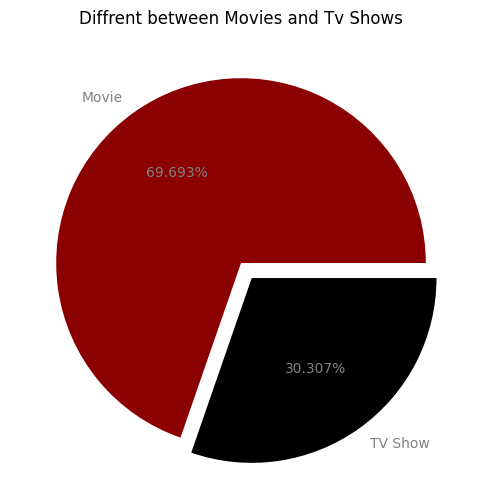

In [16]:
plt.figure(figsize=(20,6))
plt.pie(showtype['count'],labels=['Movie','TV Show'],autopct='%1.3f%%',explode=[0,0.1],colors=['darkred', 'black'],textprops={'color':'grey'})
plt.title('Diffrent between Movies and Tv Shows')
plt.show()

Conclusion:
*Based on the analysis of the Netflix content dataset, it is evident that 69.693% of the content is movies, while 30.307% is TV shows. This significant emphasis on movies suggests that Netflix caters primarily to viewers who prefer single-session viewing experiences. However, the substantial portion of TV shows indicates a strong base for episodic content as well. To optimize content strategy, Netflix should continue to diversify its movie offerings while also expanding its TV show library with varied genres and international content. Investing in original productions for both movies and TV shows can help maintain a balanced approach, attract a wider audience, and enhance subscriber retention.*

Diffrent between Movies and Tv show

In [17]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'country', 'Date',
       'release_year', 'rating', 'duration', 'Category'],
      dtype='object')

The Director

In [18]:
# the differnce between director is given or not
directors = df['director'].value_counts()
directors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [19]:
given_directors = directors.sum()-directors.iloc[0]
print( 'Given Directors :', given_directors)

Given Directors : 6202


In [27]:
import plotly.graph_objects as go

# Assuming you have values for directors[0] and given_directors
plt.figure(figsize=(20,6))
fig = go.Figure(data=[go.Pie(labels=['Given Directors', 'Not Given Directors'], 
                             values=[directors[0], given_directors],
                             title='Given Directors Vs Not Given Directors',
                             marker=dict(colors=['black', 'darkred']))])

fig.show()


C:\Users\khaja\AppData\Local\Temp\ipykernel_8888\2334245314.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Figure size 2000x600 with 0 Axes>

difference between dirctor given or not given

the number of movie or dirctor doing

In [30]:
directors = df.groupby(['director','type'])['director'].value_counts().reset_index().head(15)
directors


,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


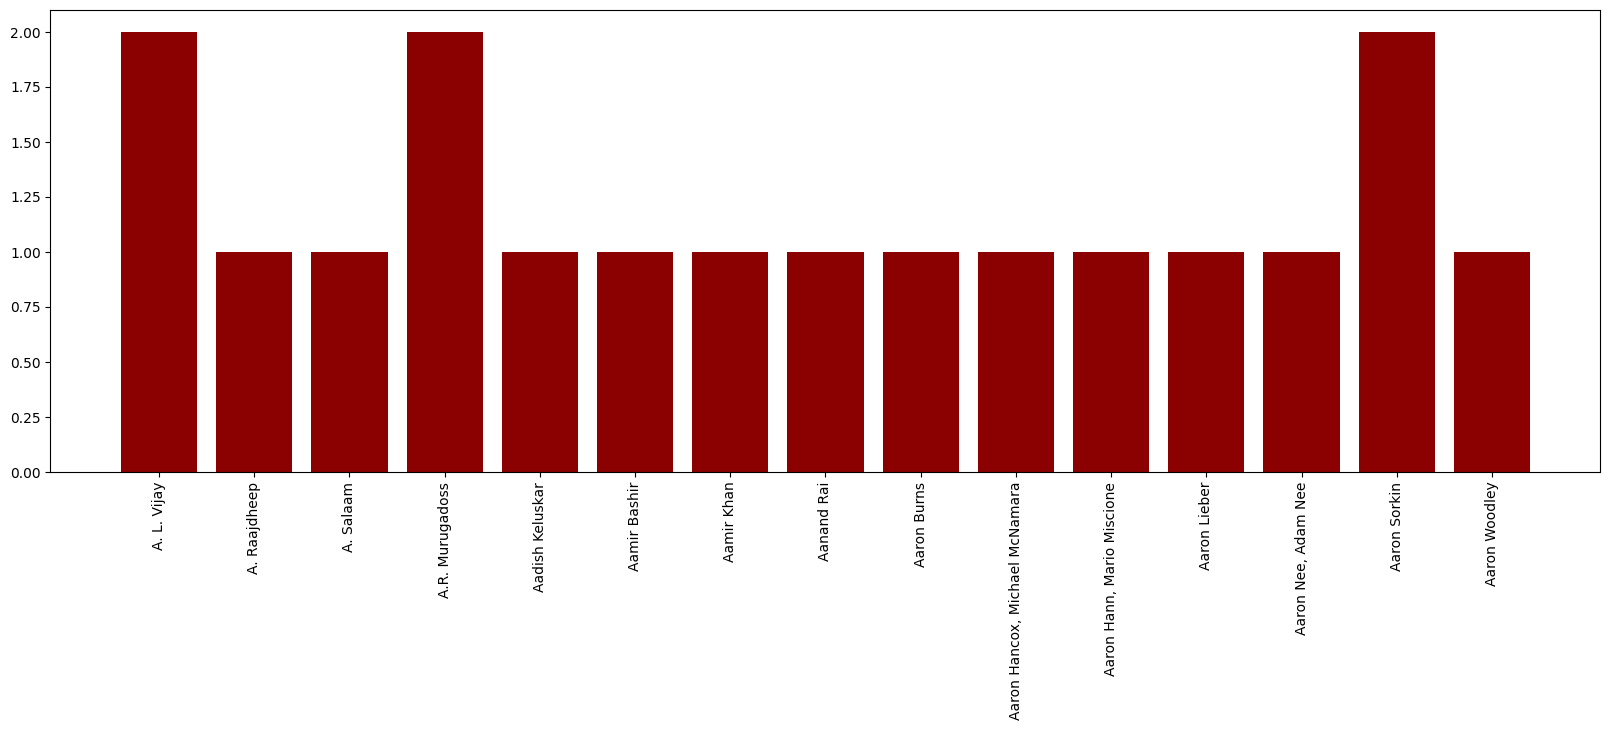

In [32]:
plt.figure(figsize=(20,6))
plt.bar(directors['director'],directors['count'],color='darkred')
plt.xticks(rotation=90)
plt.show()

number of movie or TVshow to 15 dirctor

### Country Column

In [33]:
country = df['country'].value_counts().reset_index().sort_values(by='count',ascending=False).head(60)
country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


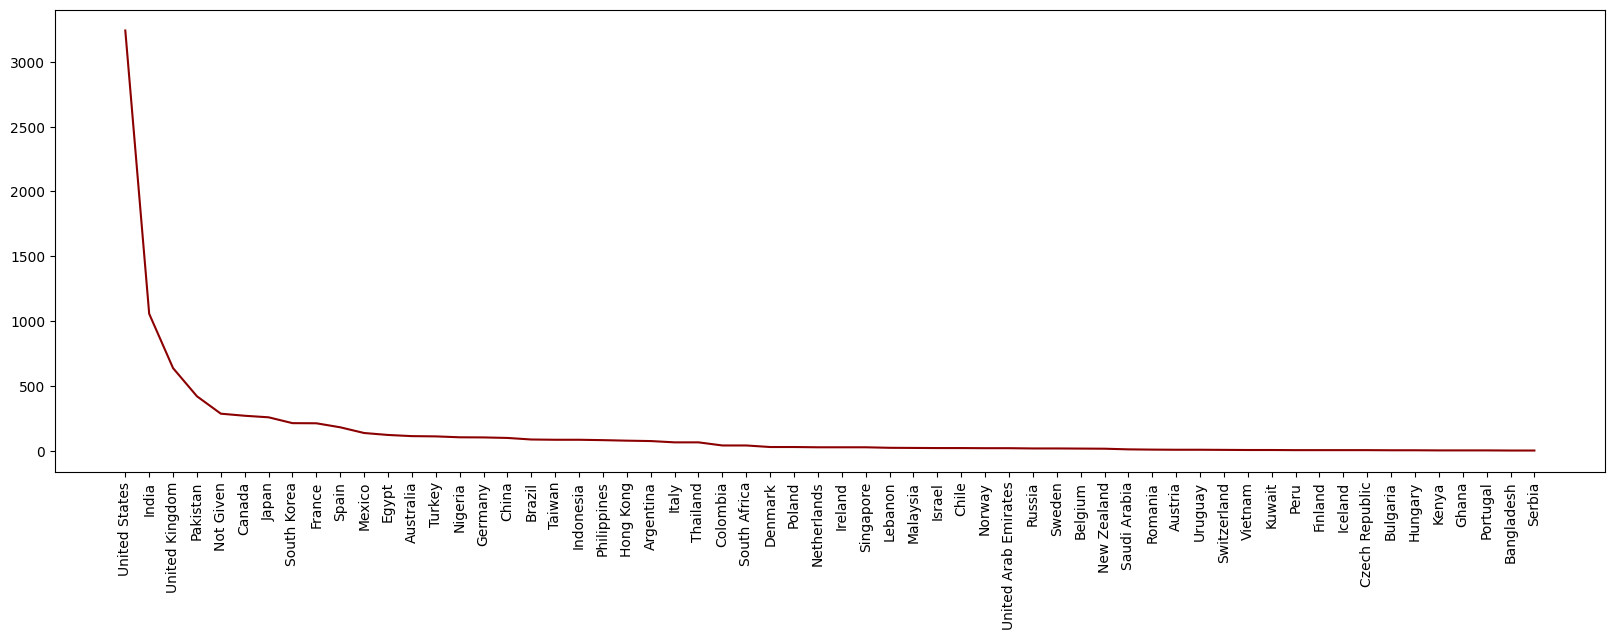

In [35]:
plt.figure(figsize=(20,6))
plt.plot(country['country'],country['count'],color='darkred')
plt.xticks(rotation=90)
plt.show()

This graphs shows more shows is in US

now determine the TVshow and movie in the every countery



### Top 10 Counrty

In [36]:
country = df['country'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
country


,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


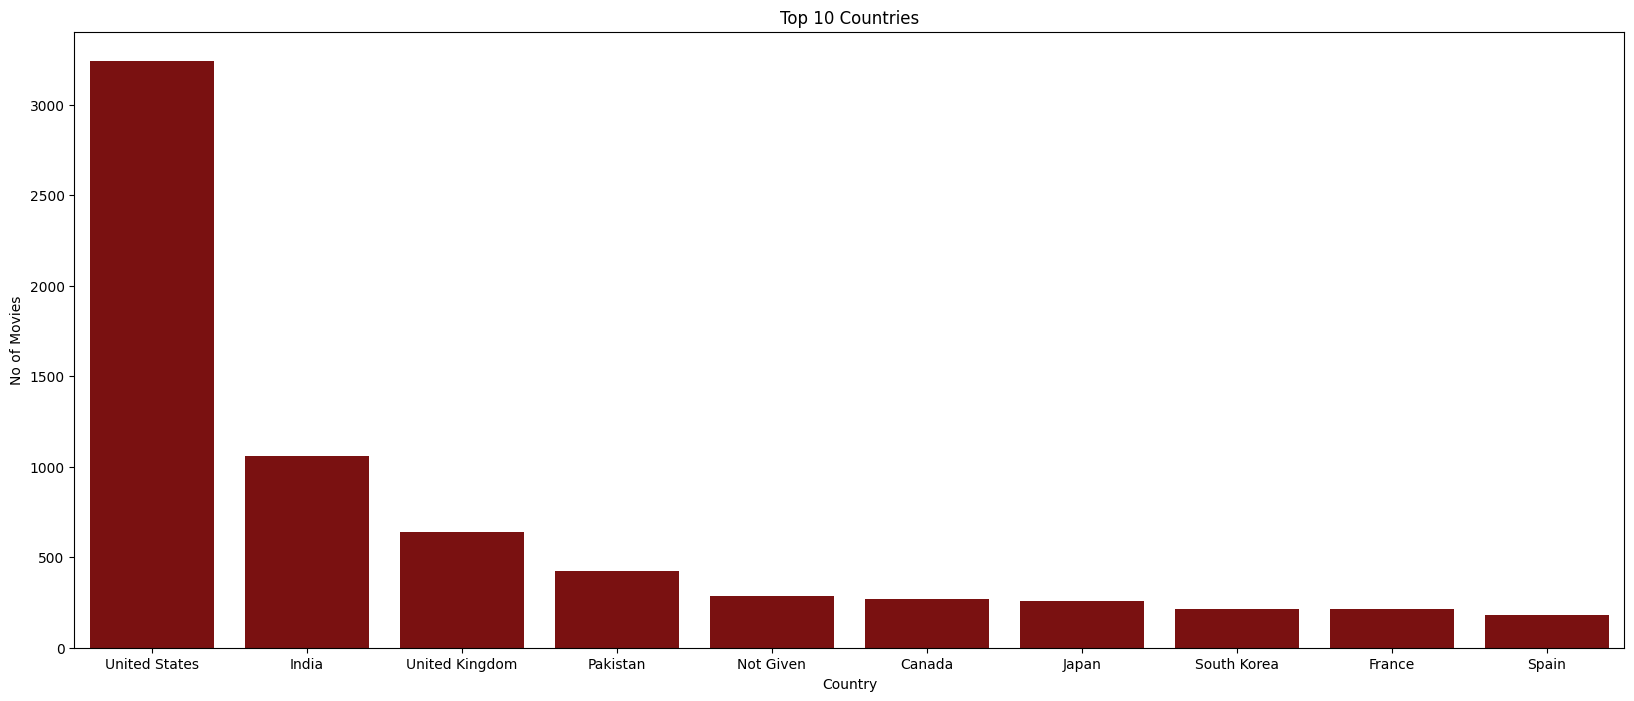

In [39]:
plt.figure(figsize=(20,8))
plt.title("Top 10 Countries")
sns.barplot(x='country',y='count',data=country,color='darkred')
plt.xlabel('Country')
plt.ylabel("No of Movies")
plt.show()

US have the greatest number of movie between top 10 Country

In [40]:
top_10_country = df.groupby('country').agg({'type'})
top_10_country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


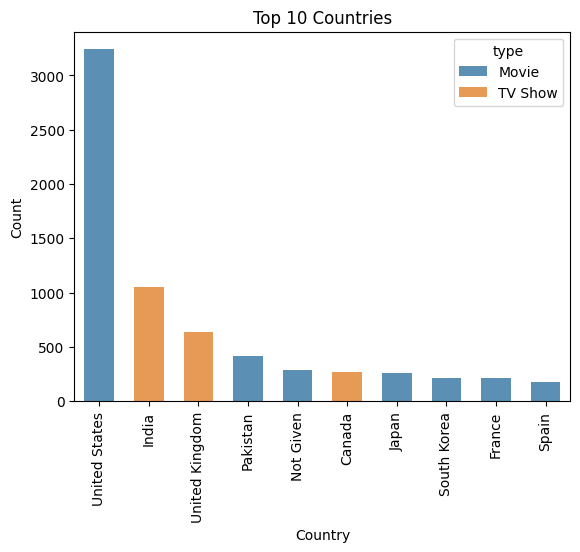

In [47]:

sns.barplot(data=top_10_country,x='country',y='count',hue=df['type'],alpha= 0.8,width=0.6)
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Release Year

In [48]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'Date',
       'release_year', 'rating', 'duration', 'Category'],
      dtype='object')

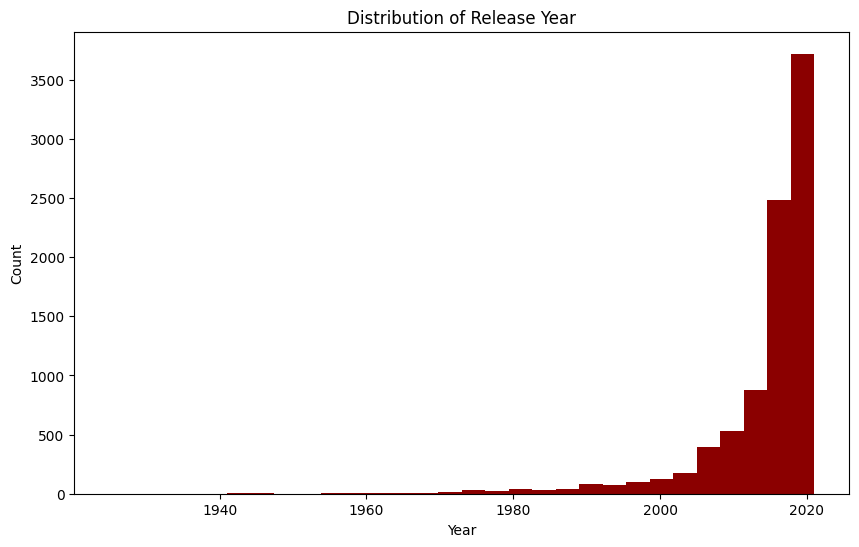

In [52]:
plt.figure(figsize=(10,6))
df['release_year'].plot(kind='hist',bins=30,color='darkred')
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel('Count')
plt.show()

Distribution Show the more movie and TVshow is from 2010 to 2020